In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from moscow_housing.display_data import import_data

plt.style.use('ggplot')
%matplotlib inline

In this notebook we will do EDA (explanatory data analysis). We will look at dataset standard statistics, individual feature analysis and finding any relations or trends considering multiple features. As a conlusion we will suggest features which can be added as a result of EDA

In [226]:
#import data
data_train, data_test = import_data()

#sometimes we have to look at all the data togheter
all_data = pd.concat([data_train,data_test])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33222 entries, 0 to 9936
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33222 non-null  int64  
 1   seller              20450 non-null  float64
 2   price               23285 non-null  float64
 3   area_total          33222 non-null  float64
 4   area_kitchen        26268 non-null  float64
 5   area_living         27321 non-null  float64
 6   floor               33222 non-null  float64
 7   rooms               33222 non-null  float64
 8   layout              8212 non-null   float64
 9   ceiling             17111 non-null  float64
 10  bathrooms_shared    27633 non-null  float64
 11  bathrooms_private   27633 non-null  float64
 12  windows_court       21662 non-null  float64
 13  windows_street      21662 non-null  float64
 14  balconies           17867 non-null  float64
 15  loggias             17867 non-null  float64
 16  condi

In [227]:
#Now lets look at all the basics of the data
print('Number of Training Examples = {}'.format(data_train.shape[0]))
print('Number of Test Examples = {}\n'.format(data_test.shape[0]))
print('Training X Shape = {}'.format(data_train.shape))
print('Training y Shape = {}\n'.format(data_train['price'].shape[0]))
print('Test X Shape = {}'.format(data_test.shape))
print('Test y Shape = {}\n'.format(data_test.shape[0]))
print('Train columns \n', list(data_train.columns))
print('Test columns \n', list(data_test.columns))

#check type of each column, and see how many duplicates we have:
for column in data_train.columns:
    print('\n - type of column: ', data_train.dtypes[column],'\n - number of null values: ', data_train[column].isnull().sum(), '\n - number of unique inputs: ', data_train[column].value_counts().count(),'\n', data_train[column].value_counts())


Number of Training Examples = 23285
Number of Test Examples = 9937

Training X Shape = (23285, 34)
Training y Shape = 23285

Test X Shape = (9937, 33)
Test y Shape = 9937

Train columns 
 ['id', 'seller', 'price', 'area_total', 'area_kitchen', 'area_living', 'floor', 'rooms', 'layout', 'ceiling', 'bathrooms_shared', 'bathrooms_private', 'windows_court', 'windows_street', 'balconies', 'loggias', 'condition', 'phones', 'building_id', 'new', 'latitude', 'longitude', 'district', 'street', 'address', 'constructed', 'material', 'stories', 'elevator_without', 'elevator_passenger', 'elevator_service', 'parking', 'garbage_chute', 'heating']
Test columns 
 ['id', 'seller', 'area_total', 'area_kitchen', 'area_living', 'floor', 'rooms', 'layout', 'ceiling', 'bathrooms_shared', 'bathrooms_private', 'windows_court', 'windows_street', 'balconies', 'loggias', 'condition', 'phones', 'building_id', 'new', 'latitude', 'longitude', 'district', 'street', 'address', 'constructed', 'material', 'stories', 'el

As we can see, the training and test set have the same number of columns except for price. Lets look at little bit closer at these features.
### **Features description**
* `id` - Unique ID for apartment
    - type of column:  int64
    - number of null values:  0
    - number of unique inputs:  23285
* `seller` - The type of apartment seller
 - type of column:  float64
 - number of null values:  8830
 - number of unique inputs:  4
* `price` - The listed price of the apartment (TARGET: only available in train)
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  9504
* `area_total` - Total area of the apartment
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  3249
* `area_kitchen` - Total kitchen area in the apartment
 - type of column:  float64
 - number of null values:  4721
 - number of unique inputs:  385
* `area_living` - Total living space area in the apartment
 - type of column:  float64
 - number of null values:  3882
 - number of unique inputs:  1041
* `floor`- Primary building floor of the apartment
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  84
* `rooms` - Number of rooms in the apartment
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  6
* `layout` - Overal apartment layout
 - type of column:  float64
 - number of null values:  17642
 - number of unique inputs:  3
* `ceiling` - Ceiling height in the apartment
 - type of column:  float64
 - number of null values:  11093
 - number of unique inputs:  121
* `bathrooms_shared` - Number of shared bathrooms
 - type of column:  float64
 - number of null values:  3872
 - number of unique inputs:  5
* `bathrooms_private` - Number of private bathrooms
 - type of column:  float64
 - number of null values:  3872
 - number of unique inputs:  5
* `windows_court` - Whether the apartment has windows facing a courtyard
 - type of column:  float64
 - number of null values:  8072
 - number of unique inputs:  2
* `windows_street` - Whether the apartment has windows facing a street
 - type of column:  float64
 - number of null values:  8072
 - number of unique inputs:  2
* `balconies` - Number of balconies in the apartment
 - type of column:  float64
 - number of null values:  10520
 - number of unique inputs:  5
* `loggias`- Number of loggias in the apartment (balcony-like, google it)
 - type of column:  float64
 - number of null values:  10520
 - number of unique inputs:  5
* `condition` - Current condition of the apartment
 - type of column:  float64
 - number of null values:  9810
 - number of unique inputs:  4
* `phones` - Number of phone numbers associated with the advert
 - type of column:  float64
 - number of null values:  80
 - number of unique inputs:  3
* `building_id` - ID used to map apartments to buildings
 - type of column:  int64
 - number of null values:  0
 - number of unique inputs:  6791
* `new` - Whether it is an old or new building
 - type of column:  float64
 - number of null values:  264
 - number of unique inputs:  2
* `latitude` - Latitude coordinate of building
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  6208
* `longitude` - Longitude coordinate of building
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  6159
* `district` - Administriative district within Moscow
 - type of column:  float64
 - number of null values:  130
 - number of unique inputs:  12
* `street` - Bulding street name
 - type of column:  object
 - number of null values:  0
 - number of unique inputs:  1682
* `address` - Building address (within street)
 - type of column:  object
 - number of null values:  0
 - number of unique inputs:  1851
* `constructed` - Year when the building was constructed
 - type of column:  float64
 - number of null values:  794
 - number of unique inputs:  128
* `material` - Primary building material used in building
 - type of column:  float64
 - number of null values:  3972
 - number of unique inputs:  7
* `stories` - Total number of floors in the building
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  62
* `elevator_without` - Whether the building has apartments without elevator access
 - type of column:  float64
 - number of null values:  357
 - number of unique inputs:  2
* `elevator_passenger` - Whether the building has apartments with passenger elevator access
 - type of column:  float64
 - number of null values:  357
 - number of unique inputs:  2
* `elevator_service` - Whether the building has apartments with service elevator access
 - type of column:  float64
 - number of null values:  357
 - number of unique inputs:  2
* `parking` - Parking options for building
 - type of column:  float64
 - number of null values:  6788
 - number of unique inputs:  3
* `garbage_chute` - Whether the building has a garbage chute system
 - type of column:  float64
 - number of null values:  8811
 - number of unique inputs:  2
* `heating` - Primary heating system used in the building
 - type of column:  float64
 - number of null values:  8161
 - number of unique inputs:  4

### **Functions**
Lets start by making some of the functions I will use to explore the data.

In [228]:
def add_radius(df):
    #adds radius column to dataframe
    df['radius'] = np.sqrt((df['latitude']-55.75)**2 + (df['longitude']-37.55)**2)
    return df

def pair_plot(df, columns):
    #plots a pairplot with the sns libary
    sns.pairplot(df[columns],
    plot_kws={'alpha': 0.6},
    diag_kws={'bins': 30})

def plot_correlation(df):
    #plots correlation in a datafram
    corr = df.corr()
    sns.heatmap(
    corr,
    linewidths=.5,
    annot=True,
    fmt='.1f'
    )

def group_by_feature_and_price(df, feature, data_train = pd.DataFrame()):
    #makes a new column with the mean price for each group to all rows
    if data_train.empty:
        grouped = df.groupby([feature])

        mean_price = grouped['price'].mean()

        df_merged = pd.merge(df,mean_price, on=feature, how='left')

        column_name = str(feature + '_price')

        df[column_name] = df_merged['price_y']
    else:
        grouped = data_train.groupby([feature])

        mean_price = grouped['price'].mean()

        df_merged = pd.merge(df,mean_price, on=feature, how='left')

        column_name = str(feature + '_price')

        df[column_name] = df_merged['price']
    return df





## **Pricing**
Pricing is our goal target, lets start by looking at how it is compared to other factors, and if we can see any interesting things

In [229]:
#code to look more at data

# plot correleation of data to see which rows to focus on
all_data.corr().style.background_gradient(cmap='coolwarm')

,id,seller,price,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id,new,latitude,longitude,district,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
id,1.000000,-0.052603,-0.027967,-0.015738,-0.020905,-0.016382,0.024773,-0.003967,0.002985,0.008162,-0.024876,-0.026092,-0.007416,-0.033120,0.057141,-0.045375,0.012366,0.055122,-0.015455,-0.052725,-0.019059,-0.001790,-0.008545,-0.023125,0.021253,0.019732,0.018349,-0.003489,0.001351,0.008241,-0.024156,-0.021557
seller,-0.052603,1.000000,0.101015,0.114169,0.382460,-0.054688,0.200700,0.027664,-0.025219,-0.028138,0.126579,0.097050,-0.148643,0.130084,-0.075228,0.062005,-0.019520,-0.234526,-0.000343,0.790485,0.025139,0.008078,0.001686,0.572010,-0.086750,0.325916,-0.134379,0.211802,0.328411,-0.204725,-0.222998,0.087738
price,-0.027967,0.101015,1.000000,0.814829,0.364758,0.707580,0.132206,0.411317,0.130822,0.031640,0.332421,0.133364,-0.005345,0.180263,0.102928,0.024877,0.109338,0.042738,0.052159,-0.089292,0.054341,-0.034022,-0.182404,0.047633,-0.100614,0.086448,0.162024,0.021846,0.024681,-0.199476,0.029171,0.087359
area_total,-0.015738,0.114169,0.814829,1.000000,0.525835,0.908238,0.154123,0.701655,0.138915,0.036523,0.380754,0.227659,0.033830,0.256950,0.100944,0.154961,0.070177,0.066881,0.030091,-0.080325,0.019680,0.004933,-0.118292,0.081003,-0.137156,0.141185,0.167959,0.047670,0.096450,-0.238187,0.010825,0.138557
area_kitchen,-0.020905,0.382460,0.364758,0.525835,1.000000,0.390412,0.165771,0.316543,0.069211,0.012117,0.312293,0.130256,-0.023496,0.157421,-0.074434,0.178316,0.073151,-0.035414,0.005901,0.263295,0.018770,-0.000278,-0.016764,0.380721,-0.104652,0.255480,0.075488,0.156485,0.303741,-0.208266,-0.105753,0.156648
area_living,-0.016382,-0.054688,0.707580,0.908238,0.390412,1.000000,0.094875,0.724326,0.151520,0.034422,0.349816,0.188046,0.074643,0.214452,0.080110,0.147852,0.089282,0.103567,0.030003,-0.160674,0.020253,0.003917,-0.095537,-0.018279,-0.142003,0.098866,0.154498,0.016913,0.043219,-0.219657,0.018657,0.134478
floor,0.024773,0.200700,0.132206,0.154123,0.165771,0.094875,1.000000,0.058872,0.024154,0.008189,0.079292,0.024448,-0.114935,0.119786,-0.051326,0.109784,0.003747,-0.008283,-0.005646,0.133770,0.014273,-0.010054,-0.038466,0.271538,0.001326,0.661474,0.060604,0.184761,0.246350,-0.215459,-0.012574,0.029743
rooms,-0.003967,0.027664,0.411317,0.701655,0.316543,0.724326,0.058872,1.000000,0.187718,0.039430,0.207147,0.302374,0.081035,0.295852,0.120401,0.136311,0.092408,0.070059,0.018164,-0.106185,0.020456,0.009150,-0.096207,-0.038688,-0.135800,0.058696,0.092750,0.015345,0.020973,-0.165002,0.009578,0.078365
layout,0.002985,-0.025219,0.130822,0.138915,0.069211,0.151520,0.024154,0.187718,1.000000,-0.005999,-0.000495,0.121184,0.005437,0.107457,-0.014785,0.037364,0.040491,0.000060,0.020292,-0.004560,0.007657,-0.002857,-0.044148,0.009626,-0.051204,0.042315,-0.026582,0.106278,0.036600,-0.049716,0.018770,0.018772
ceiling,0.008162,-0.028138,0.031640,0.036523,0.012117,0.034422,0.008189,0.039430,-0.005999,1.000000,0.016953,0.008068,0.011096,-0.002414,-0.004163,0.001201,0.002813,0.028909,-0.005247,-0.027104,0.017963,0.011895,-0.023826,-0.009947,-0.010620,0.003292,0.028703,-0.018169,0.002477,-0.025230,-0.015116,-0.005107


## **Adding values to data**
### **Radius**
We saw that longitude and latitude didnt have an impact, lets see if we can change this into radius and check the effect

In [230]:
#add radius to test, all data and training data
data_train = add_radius(data_train)
data_test = add_radius(data_test)
all_data = add_radius(all_data)

### **Grouping features to make more powerfull features**
#### **Districts**
I think that there could be some value in grouping the different districts, to get the average price in that district as a feature

In [231]:
#group data by district and look at correleation for new feature
data_train = group_by_feature_and_price(data_train,'district')
data_test = group_by_feature_and_price(data_test, 'district', data_train=data_train)
all_data = group_by_feature_and_price(all_data, 'district')

### **Street**
There is also normal that a street has some sort of similar price or is in the same pricerange

In [232]:
#group data by street
data_train = group_by_feature_and_price(data_train,'street')
data_test = group_by_feature_and_price(data_test, 'street', data_train=data_train)
all_data = group_by_feature_and_price(all_data, 'street')

### **Building**
Apartments in the same building often has the same price

In [233]:
#group data by building_id
data_train = group_by_feature_and_price(data_train,'building_id')
data_test = group_by_feature_and_price(data_test, 'building_id', data_train=data_train)
all_data = group_by_feature_and_price(all_data, 'building_id')


### **Conclusion**

In [234]:
#lets check the result, for example how they correlate with price, and also chek their pair plots
all_data.corr().style.background_gradient(cmap='coolwarm')

,id,seller,price,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id,new,latitude,longitude,district,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating,radius,district_price,street_price,building_id_price
id,1.000000,-0.052603,-0.027967,-0.015738,-0.020905,-0.016382,0.024773,-0.003967,0.002985,0.008162,-0.024876,-0.026092,-0.007416,-0.033120,0.057141,-0.045375,0.012366,0.055122,-0.015455,-0.052725,-0.019059,-0.001790,-0.008545,-0.023125,0.021253,0.019732,0.018349,-0.003489,0.001351,0.008241,-0.024156,-0.021557,0.019855,-0.005912,-0.005588,-0.005418
seller,-0.052603,1.000000,0.101015,0.114169,0.382460,-0.054688,0.200700,0.027664,-0.025219,-0.028138,0.126579,0.097050,-0.148643,0.130084,-0.075228,0.062005,-0.019520,-0.234526,-0.000343,0.790485,0.025139,0.008078,0.001686,0.572010,-0.086750,0.325916,-0.134379,0.211802,0.328411,-0.204725,-0.222998,0.087738,-0.028285,0.086689,0.020152,0.021443
price,-0.027967,0.101015,1.000000,0.814829,0.364758,0.707580,0.132206,0.411317,0.130822,0.031640,0.332421,0.133364,-0.005345,0.180263,0.102928,0.024877,0.109338,0.042738,0.052159,-0.089292,0.054341,-0.034022,-0.182404,0.047633,-0.100614,0.086448,0.162024,0.021846,0.024681,-0.199476,0.029171,0.087359,-0.262705,0.423958,0.684149,0.757748
area_total,-0.015738,0.114169,0.814829,1.000000,0.525835,0.908238,0.154123,0.701655,0.138915,0.036523,0.380754,0.227659,0.033830,0.256950,0.100944,0.154961,0.070177,0.066881,0.030091,-0.080325,0.019680,0.004933,-0.118292,0.081003,-0.137156,0.141185,0.167959,0.047670,0.096450,-0.238187,0.010825,0.138557,-0.022147,0.285866,0.404890,0.443182
area_kitchen,-0.020905,0.382460,0.364758,0.525835,1.000000,0.390412,0.165771,0.316543,0.069211,0.012117,0.312293,0.130256,-0.023496,0.157421,-0.074434,0.178316,0.073151,-0.035414,0.005901,0.263295,0.018770,-0.000278,-0.016764,0.380721,-0.104652,0.255480,0.075488,0.156485,0.303741,-0.208266,-0.105753,0.156648,-0.026204,0.152762,0.186002,0.202016
area_living,-0.016382,-0.054688,0.707580,0.908238,0.390412,1.000000,0.094875,0.724326,0.151520,0.034422,0.349816,0.188046,0.074643,0.214452,0.080110,0.147852,0.089282,0.103567,0.030003,-0.160674,0.020253,0.003917,-0.095537,-0.018279,-0.142003,0.098866,0.154498,0.016913,0.043219,-0.219657,0.018657,0.134478,-0.020472,0.248209,0.357257,0.387714
floor,0.024773,0.200700,0.132206,0.154123,0.165771,0.094875,1.000000,0.058872,0.024154,0.008189,0.079292,0.024448,-0.114935,0.119786,-0.051326,0.109784,0.003747,-0.008283,-0.005646,0.133770,0.014273,-0.010054,-0.038466,0.271538,0.001326,0.661474,0.060604,0.184761,0.246350,-0.215459,-0.012574,0.029743,-0.011714,0.065393,0.065036,0.076301
rooms,-0.003967,0.027664,0.411317,0.701655,0.316543,0.724326,0.058872,1.000000,0.187718,0.039430,0.207147,0.302374,0.081035,0.295852,0.120401,0.136311,0.092408,0.070059,0.018164,-0.106185,0.020456,0.009150,-0.096207,-0.038688,-0.135800,0.058696,0.092750,0.015345,0.020973,-0.165002,0.009578,0.078365,-0.017626,0.208583,0.263372,0.280677
layout,0.002985,-0.025219,0.130822,0.138915,0.069211,0.151520,0.024154,0.187718,1.000000,-0.005999,-0.000495,0.121184,0.005437,0.107457,-0.014785,0.037364,0.040491,0.000060,0.020292,-0.004560,0.007657,-0.002857,-0.044148,0.009626,-0.051204,0.042315,-0.026582,0.106278,0.036600,-0.049716,0.018770,0.018772,-0.007986,0.085844,0.087920,0.088564
ceiling,0.008162,-0.028138,0.031640,0.036523,0.012117,0.034422,0.008189,0.039430,-0.005999,1.000000,0.016953,0.008068,0.011096,-0.002414,-0.004163,0.001201,0.002813,0.028909,-0.005247,-0.027104,0.017963,0.011895,-0.023826,-0.009947,-0.010620,0.003292,0.028703,-0.018169,0.002477,-0.025230,-0.015116,-0.005107,-0.018571,0.014578,0.024023,0.023676


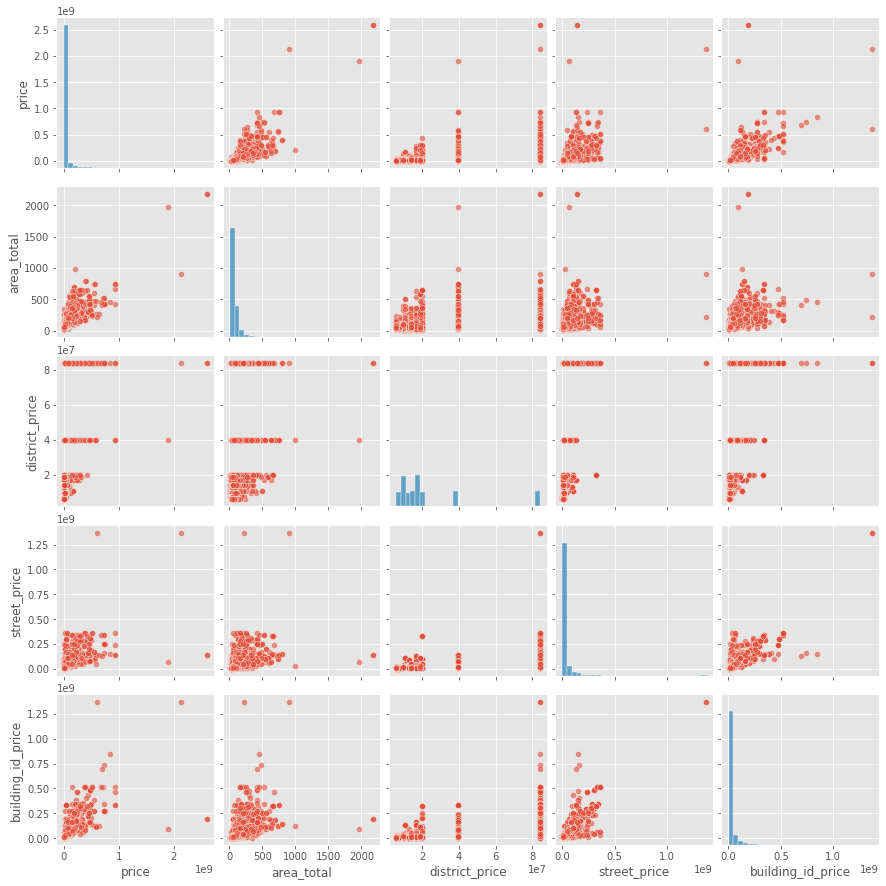

In [235]:
pair_plot(data_train,['price', 'area_total','district_price','street_price','building_id_price'])

on the pair plots we can see that a lot of the data is affected by some extreme values, lets see what happens when we remove these values, we will also have to calculate new means()

In [236]:
#find n largest prices
n_largest = data_train.nlargest(4,'price')['price']
print(n_largest)

#removes 4 larges inputs to get better data
train_dropped = data_train.drop([3217,21414,15840,13938])
all_dropped = all_data.drop([3217,21414,15840,13938])

train_dropped = group_by_feature_and_price(train_dropped,'district')
all_dropped = group_by_feature_and_price(all_dropped, 'district')
train_dropped = group_by_feature_and_price(train_dropped,'street')
all_dropped = group_by_feature_and_price(all_dropped, 'street')
train_dropped = group_by_feature_and_price(train_dropped,'building_id')
all_dropped = group_by_feature_and_price(all_dropped, 'building_id')

#lets check new correlation and compare with previous
all_dropped.corr().style.background_gradient(cmap='coolwarm')

3217     2.600000e+09
21414    2.600000e+09
15840    2.133159e+09
13938    1.900000e+09
Name: price, dtype: float64


C:\Users\Styrk\AppData\Local\Temp/ipykernel_21976/4290156861.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df_merged['price_y']


,id,seller,price,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id,new,latitude,longitude,district,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating,radius,district_price,street_price,building_id_price
id,1.000000,-0.052603,-0.036619,-0.015411,-0.020938,-0.016505,0.025211,-0.003819,0.002985,0.008164,-0.024889,-0.026111,-0.007440,-0.033172,0.057109,-0.045414,0.012337,0.055126,-0.015475,-0.052735,-0.019055,-0.001789,-0.008607,-0.023121,0.021249,0.019961,0.018419,-0.003487,0.001350,0.008239,-0.024036,-0.021570,0.019853,-0.006027,-0.006142,-0.005576
seller,-0.052603,1.000000,0.101015,0.114169,0.382460,-0.054688,0.200700,0.027664,-0.025219,-0.028138,0.126579,0.097050,-0.148643,0.130084,-0.075228,0.062005,-0.019520,-0.234526,-0.000343,0.790485,0.025139,0.008078,0.001686,0.572010,-0.086750,0.325916,-0.134379,0.211802,0.328411,-0.204725,-0.222998,0.087738,-0.028285,0.069079,0.040443,0.038072
price,-0.036619,0.101015,1.000000,0.788065,0.385931,0.720272,0.099677,0.482338,0.130822,0.037562,0.332421,0.133364,-0.005345,0.180263,0.112671,0.032622,0.131220,0.053338,0.058626,-0.102534,0.064727,-0.039369,-0.213477,0.055310,-0.118450,0.066001,0.191020,0.024180,0.029630,-0.233787,0.031345,0.114153,-0.309036,0.429208,0.513798,0.561132
area_total,-0.015411,0.114169,0.788065,1.000000,0.525498,0.907223,0.134951,0.739369,0.138915,0.038445,0.380750,0.227647,0.033811,0.256918,0.101041,0.156990,0.073904,0.071094,0.029544,-0.082839,0.020783,0.005358,-0.122643,0.085001,-0.145296,0.131305,0.175199,0.049701,0.101536,-0.252042,0.009242,0.151177,-0.023161,0.263112,0.319043,0.334950
area_kitchen,-0.020938,0.382460,0.385931,0.525498,1.000000,0.389420,0.165918,0.315978,0.069211,0.012119,0.312285,0.130239,-0.023525,0.157368,-0.074871,0.178937,0.073735,-0.035329,0.005779,0.263632,0.018767,-0.000277,-0.016473,0.380878,-0.104179,0.255796,0.075731,0.156511,0.304281,-0.208231,-0.105645,0.156274,-0.026196,0.130408,0.148633,0.154460
area_living,-0.016505,-0.054688,0.720272,0.907223,0.389420,1.000000,0.095713,0.727267,0.151520,0.034428,0.349811,0.188024,0.074611,0.214388,0.080232,0.151255,0.091578,0.104710,0.029883,-0.161353,0.020350,0.003943,-0.095178,-0.018677,-0.141362,0.100223,0.156336,0.016818,0.044790,-0.219599,0.018806,0.134135,-0.020548,0.230219,0.284216,0.299426
floor,0.025211,0.200700,0.099677,0.134951,0.165918,0.095713,1.000000,0.057868,0.024154,0.008211,0.079300,0.024459,-0.114923,0.119820,-0.051298,0.109806,0.003909,-0.008089,-0.006077,0.134811,0.014287,-0.010068,-0.037784,0.272281,0.001510,0.660114,0.059849,0.185238,0.246825,-0.215412,-0.013286,0.030256,-0.011670,0.062643,0.069247,0.066590
rooms,-0.003819,0.027664,0.482338,0.739369,0.315978,0.727267,0.057868,1.000000,0.187718,0.039438,0.207139,0.302360,0.081002,0.295795,0.120255,0.136532,0.092711,0.070174,0.017894,-0.106019,0.020462,0.009165,-0.096130,-0.038824,-0.135585,0.058040,0.092726,0.015261,0.021034,-0.164797,0.009596,0.078277,-0.017606,0.188638,0.228414,0.233445
layout,0.002985,-0.025219,0.130822,0.138915,0.069211,0.151520,0.024154,0.187718,1.000000,-0.005999,-0.000495,0.121184,0.005437,0.107457,-0.014785,0.037364,0.040491,0.000060,0.020292,-0.004560,0.007657,-0.002857,-0.044148,0.009626,-0.051204,0.042315,-0.026582,0.106278,0.036600,-0.049716,0.018770,0.018772,-0.007986,0.071806,0.075536,0.081445
ceiling,0.008164,-0.028138,0.037562,0.038445,0.012119,0.034428,0.008211,0.039438,-0.005999,1.000000,0.016954,0.008069,0.011097,-0.002412,-0.004161,0.001202,0.002813,0.028909,-0.005245,-0.027106,0.017962,0.011893,-0.023826,-0.009947,-0.010620,0.003296,0.028704,-0.018169,0.002477,-0.025231,-0.015126,-0.005107,-0.018573,0.008087,0.009002,0.008575


We can see that district_price is not affected, showing that this feature is stable and can withstans extreme values
street and building dropped a little bit, but maybe its not that important. However the pair plots might look different now.

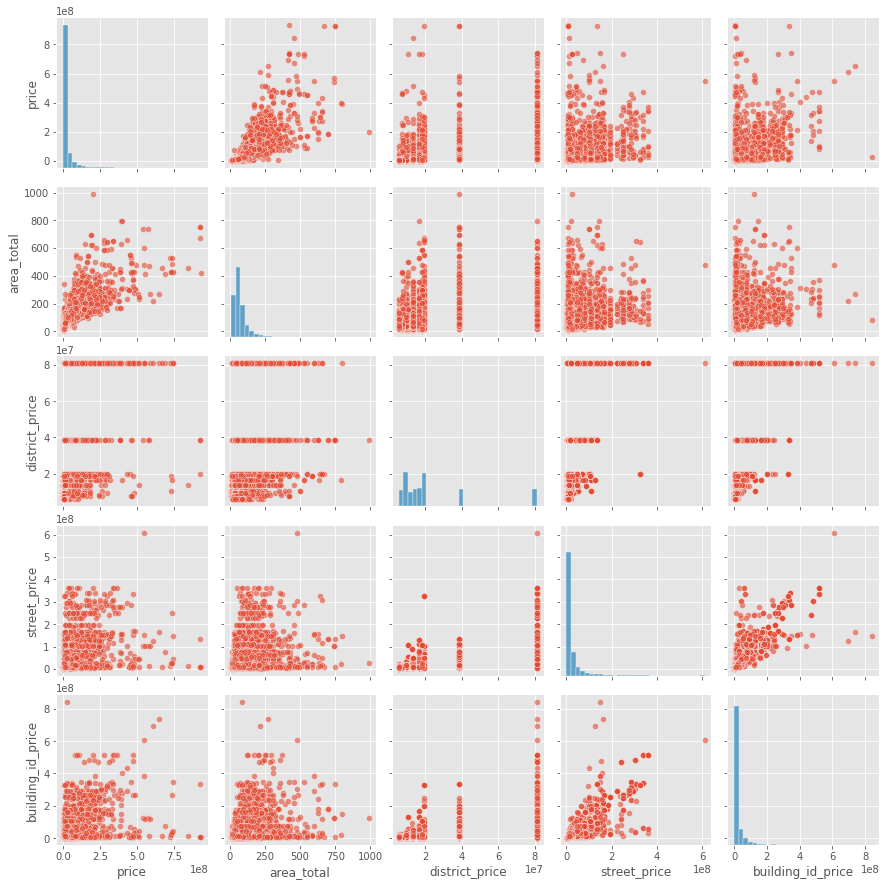

In [237]:
pair_plot(train_dropped,['price', 'area_total','district_price','street_price','building_id_price'])

The piar plots does now look a little bit better, at least they are more zoomed in.
### **Use of information**
Lets check if our new features can be used in the test set

In [238]:
print('number of common buildind_id:\n',data_train['building_id'].isin(data_test['building_id']).sum())
print('common streets in both sets:\n',data_train[['street']].isin(data_test[['street']]).sum())
print('number of unique streets:', len(all_data['street'].unique()))

number of common buildind_id:
 0
common streets in both sets:
 street    27
dtype: int64
number of unique streets: 1852


As we can see there is not any common buildings in the test set and train set. Therefor average building price is not important
Unless we can use some other features to train the average bulding price this information should not be used in our model

We can also see that the there are only 27 common streets in the two sets, but over 1800 unique streets combined. This information is usefull for some of the rows in the test set, but not for everyone.

However we still want to use information about the building, how can we accomplish this. LJIFABA=???? have to do this

## **Outliers**

Now lets look at the outliers, lets start looking at the radius

In [239]:
max_value = data_train['radius'].max()
min_value = data_train['radius'].min()

print('rows with missing latitude and longitude in test data: \n ',data_test[['longitude','latitude']][data_test['longitude'].isnull() == True])

max_value_test = data_test['radius'].nlargest(10)
print('max radius from trainingset: \n',max_value, '\n10 highest values from test set:\n',max_value_test)

rows with missing latitude and longitude in test data: 
      longitude  latitude
23        NaN       NaN
90        NaN       NaN
max radius from trainingset: 
 0.7564444961376798 
10 highest values from test set:
 2511    106.579234
5090    106.579234
6959    106.579234
8596    106.579234
4719     96.021654
9547     96.012910
2529     39.132054
3117      0.756266
834       0.755604
873       0.755604
Name: radius, dtype: float64


As we can see from the code above, the test set is missing 2 longitude/latitude entries
there is also 6 houses which is outsie moscow, have to remove radius for these buildings and look at other factors
Want to look at the rows which is missing longitude and latitude, do they have anything else which connects the to moscow?

row 23 and 90 is missing radius

rows outside moscov:
2511    106.579234
5090    106.579234
6959    106.579234
8596    106.579234
4719     96.021654
9547     96.012910
2529     39.132054

In [240]:
#print(data_with_radius.loc[[23]]['street'])
#print(data_with_radius.loc[[90]]['building_id'])
#print(data_with_radius[data_with_radius['street']=='пос. Коммунарка'])
data_test._set_value(23,'radius',0.203899)
data_test._set_value(90,'radius',0.203899)



#Now we dont have any missing radius values in the test data
#lets look at the rows outside of moscov
data_test._set_value(2511,'radius',0.218159)
data_test._set_value(5090,'radius',0.218159)
data_test._set_value(6959,'radius',0.218159)
data_test._set_value(8596,'radius',0.218159)

#print(data_test.loc[[2511]][['street']])
#print(data_test.loc[[5090]][['longitude','latitude']])
#print(data_test.loc[[6959]])
#print(data_test.loc[[8596]])
#print(data_with_radius[data_with_radius['street']=='Бунинские Луга ЖК'])

#print(data_test.loc[[4719]][['street','address']])
#print(data_with_radius[['address','radius']][data_with_radius['street']=='улица Центральная'])

data_test._set_value(4719, 'radius',0.19580)
data_test._set_value(9547, 'radius',0.19520)

#print(data_test.loc[[2529]][['street','address','district']])
#print(data_with_radius[['longitude','latitude']][data_with_radius['street']=='улица 1-я Линия'])
data_test._set_value(2529, 'radius', np.sqrt((37.464994-37.55)**2+(55.627666-55.75)**2))

### **Outliers continue**
Now we have fixed everythin for radius, lets look at the most extreme prices in the training data

In [241]:
largest_area = data_train.nlargest(5, columns='area_total')
largest_area_test = data_test.nlargest(5, columns='area_total')
print(largest_area_test,'\n', largest_area)

         id  seller  area_total  area_kitchen  area_living  floor  rooms  \
9099  32384     1.0      1175.0          40.0        528.0   17.0    6.0   
3496  26781     NaN      1050.0           NaN        320.0    1.0    6.0   
6538  29823     NaN       811.0          29.0        438.0   23.0    6.0   
7931  31216     1.0       732.0           NaN        500.0   30.0    1.0   
3182  26467     NaN       644.0          40.0        506.0   17.0    6.0   

      layout  ceiling  bathrooms_shared  ...  elevator_without  \
9099     1.0      NaN               4.0  ...               1.0   
3496     NaN     3.02               NaN  ...               1.0   
6538     NaN      NaN               4.0  ...               0.0   
7931     NaN      NaN               NaN  ...               0.0   
3182     NaN      NaN               4.0  ...               1.0   

      elevator_passenger  elevator_service  parking  garbage_chute  heating  \
9099                 1.0               1.0      0.0            1.0 

### **Missing data**
Some colums have a lot of misssing data, lets look at a way for each column.
Layout is the colums with the most missing data, lets take a lot at that

In [242]:
layout_data = data_train['layout']
print('number of missing values: ',layout_data.isnull().sum())

#check correleation between layout and other data
layout_corr = data_train.corr()
print(layout_corr['layout'].nlargest(4))
#layout_corr.style.background_gradient(cmap='coolwarm')

#didnt find anythin, will check difference in price among nan values and thos who actually have floor
mean_price_without_nan = data_train[~data_train['layout'].isnull()]['price'].mean()
mean_price_with_nan = data_train[data_train['layout'].isnull()]['price'].mean()

print(mean_price_without_nan,mean_price_with_nan)
#these prices ar3e quit similar, lets check year.

mean_year_without_nan = data_train[~data_train['layout'].isnull()]['constructed'].mean()
mean_year_with_nan = data_train[data_train['layout'].isnull()]['constructed'].mean()
print(mean_year_without_nan,mean_year_with_nan)
#as we can see there are quite strong evidence that there is a correleation betweem if layous is mising or not, and building year

#From my understanding, the second most important feature is the size of the living room, lets see how many null values we have here
print('trainig set:', data_train['area_living'].isnull().sum(),'\ntest set: ', data_test['area_living'].isnull().sum())

#There is a lot of missing values, how can we fix this, check if we group by building, how good the correleation betweem actual and buding average
grouped_by_building = data_train.groupby(['building_id'])
mean_area_living = grouped_by_building['area_living'].mean()
print(mean_area_living)

data_with_group = pd.merge(data_train,mean_area_living, on='building_id', how='left')

data_test['mean_area_living'] = data_with_group['area_living_y']

corr = data_test.corr()
corr.style.background_gradient(cmap='coolwarm')
#this did not have a high correlation, and can not be used. Lets try and make a function for fin





number of missing values:  17642
layout         1.000000
rooms          0.192759
area_living    0.160304
area_total     0.147221
Name: layout, dtype: float64
23028014.968633704 23725111.14420134
1992.5907834101383 2005.9525372084847
trainig set: 3882 
test set:  2019
building_id
0       47.000000
1       20.000000
2       55.000000
3       30.500000
7       79.000000
          ...    
9730          NaN
9731    60.000000
9732    34.000000
9733    50.000000
9735    19.107143
Name: area_living, Length: 6791, dtype: float64


C:\Users\Styrk\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\Styrk\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,id,seller,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id,new,latitude,longitude,district,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating,radius,district_price,street_price,building_id_price,mean_area_living
id,1.000000,-0.058195,-0.023568,-0.033529,-0.040915,0.052155,-0.023711,-0.032457,-0.026743,-0.064674,0.042337,-0.053876,0.005884,0.056167,-0.032173,0.027226,0.092249,-0.003781,-0.020978,-0.009185,0.003473,-0.023446,-0.019023,-0.012664,0.052139,-0.024039,-0.001088,-0.002118,0.026918,0.033613,-0.011733,0.020726,-0.034932,-0.023124,nan,-0.034941
seller,-0.058195,1.000000,0.113482,0.399771,-0.052427,0.228773,0.041186,0.004196,-0.035665,0.118195,0.025702,-0.113544,0.085893,-0.049053,0.016070,-0.029688,-0.234290,0.013428,0.787450,0.035144,0.021554,0.033350,0.543578,-0.049716,0.377033,-0.132669,0.206614,0.323981,-0.235845,-0.211205,-0.048069,-0.170730,0.117292,0.078328,nan,-0.015154
area_total,-0.023568,0.113482,1.000000,0.518186,0.908031,0.093670,0.745772,0.123475,0.029119,0.385374,0.234274,0.039813,0.240568,0.095102,0.190736,0.037837,0.080767,-0.035519,-0.088626,0.018767,0.021231,-0.114594,0.043569,-0.133999,0.057128,0.177297,0.041435,0.105803,-0.190199,-0.001846,0.160145,-0.317130,0.389720,0.409348,nan,0.033298
area_kitchen,-0.033529,0.399771,0.518186,1.000000,0.392154,0.184433,0.329566,0.061945,0.011253,0.308358,0.129693,-0.014770,0.156617,-0.094727,0.204741,0.036354,-0.027165,-0.035565,0.274958,0.025782,0.016492,-0.033902,0.378458,-0.110395,0.274400,0.089397,0.154756,0.313262,-0.186030,-0.107605,0.124520,-0.244541,0.224180,0.203569,nan,-0.004977
area_living,-0.040915,-0.052427,0.908031,0.392154,1.000000,0.075751,0.725616,0.135806,0.031226,0.345769,0.207811,0.075018,0.189845,0.083118,0.182542,0.069598,0.116000,-0.020757,-0.157089,0.015721,0.020036,-0.091678,-0.054165,-0.133177,0.057387,0.141011,0.008243,0.041331,-0.171710,-0.001020,0.126821,-0.273781,0.356721,0.377875,nan,0.018475
floor,0.052155,0.228773,0.093670,0.184433,0.075751,1.000000,0.027470,0.030200,0.025557,0.041825,0.036945,-0.081580,0.079418,-0.059609,0.102027,-0.040882,-0.005657,-0.035853,0.183778,0.010123,-0.010640,-0.066074,0.299282,-0.000175,0.629420,0.031389,0.197615,0.263465,-0.185324,-0.002074,0.079097,-0.101561,0.017284,-0.026100,nan,0.012229
rooms,-0.023711,0.041186,0.745772,0.329566,0.725616,0.027470,1.000000,0.177672,0.028176,0.225613,0.303034,0.075028,0.295137,0.101774,0.157473,0.081792,0.064667,-0.005026,-0.107754,0.016734,0.024211,-0.087808,-0.071814,-0.122526,0.009840,0.084767,0.002399,0.009446,-0.123157,0.004704,0.089407,-0.259274,0.295195,0.280317,nan,0.017405
layout,-0.032457,0.004196,0.123475,0.061945,0.135806,0.030200,0.177672,1.000000,-0.006466,-0.014210,0.120714,0.018275,0.115660,-0.018517,0.039868,0.039472,0.009656,-0.006236,0.008605,0.010960,-0.003244,-0.030350,0.024402,-0.014582,0.057662,-0.063007,0.143868,0.027895,-0.037141,0.028330,0.013235,-0.067702,0.110310,0.057890,nan,0.007462
ceiling,-0.026743,-0.035665,0.029119,0.011253,0.031226,0.025557,0.028176,-0.006466,1.000000,0.030910,-0.010543,0.028039,-0.025045,0.003905,-0.022300,-0.026384,0.024011,-0.017053,-0.031615,0.027428,0.010596,-0.015235,-0.000728,0.012580,0.020686,0.043654,-0.016423,0.009446,-0.008838,-0.024742,0.008623,-0.025643,0.002515,0.003853,nan,-0.000600
bathrooms_shared,-0.064674,0.118195,0.385374,0.308358,0.345769,0.041825,0.225613,-0.014210,0.030910,1.000000,-0.617390,0.081889,0.008477,-0.071834,0.154323,0.086526,0.042144,-0.026515,0.031804,-0.002121,-0.008845,-0.037147,0.157842,-0.092470,0.084133,0.166599,0.055401,0.172477,-0.156600,-0.126718,0.115624,-0.219972,0.249314,0.239170,nan,0.032860
